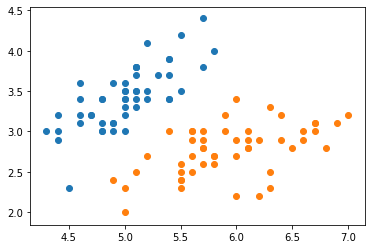

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
"""
load_iris是一个经典的机器学习数据集，它包含了150个样本
这个数据集中的四个特征分别是花萼长度（sepal length）、花萼宽度（sepal width）、花瓣长度（petal length）和花瓣宽度（petal width），
它们都是以厘米（cm）为单位测量的。目标变量是鸢尾花的种类，
有三种不同的种类：Setosa、Versicolour和Virginica。
它们的中文名分别是山鸢尾、杂色鸢尾和维吉尼亚鸢尾。
"""
iris = datasets.load_iris()

x = iris.data
y = iris.target
# 只做一个简单的二分类,获取分类是山鸢尾、杂色鸢尾的数据，同时取2维的特征就行了
x = x[y<2, :2]
y = y[y<2]
#分别绘制出分类是0和1的点，不同的scatter颜色不一样
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()


C:\Users\liaomin\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'linewidth'


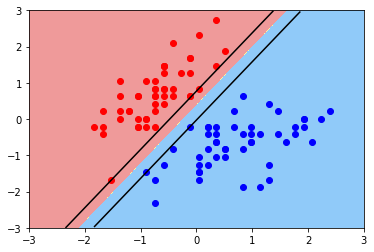

In [11]:
# 标准化数据
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
#数据归一化
standardscaler = StandardScaler()
standardscaler.fit(x)
x_standard = standardscaler.transform(x)
svc = LinearSVC(C=1e9)
svc.fit(x_standard, y)

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
                         np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),)
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    w = model.coef_[0]
    b = model.intercept_[0]
    # w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0, 0], x_standard[y==0, 1], color='red')
plt.scatter(x_standard[y==1, 0], x_standard[y==1, 1], color='blue')
plt.show()

C:\Users\liaomin\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'linewidth'


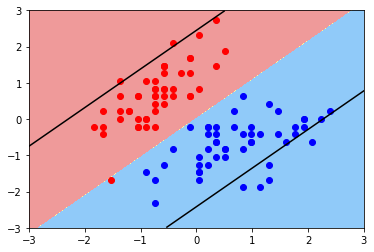

[[ 4.03243354 -2.50701402]] [0.92734436]


In [12]:
svc2 = LinearSVC(C=0.01)
svc2.fit(x_standard, y)

plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0, 0], x_standard[y==0, 1], color='red')
plt.scatter(x_standard[y==1, 0], x_standard[y==1, 1], color='blue')
plt.show()
print(svc.coef_,svc.intercept_)
